In [ ]:
! pip install ipykernel
! pip install pandas
! pip install openpyxl
! pip install statsmodels
! pip install scikit-learn

In [1]:
import pandas as pd

train = pd.read_excel("Time series analysis, modelling Rain water Discharge.xlsx",sheet_name="Training",index_col='Date')
print(train.shape)
train.head(2)

(3652, 9)


,Precipitation (MM),Catchment Area (Sq.km),Basin Slope,CN,Flow length (km),Maximum Infiltartion (MM/HR),Impervious(%),Tension Storage (MM),Total Flow (M3/S)
Date,,,,,,,,,
2009-01-01,0.0,180.13,0.28955,75,41.18673,3.3953,26,26.524,0.0
2009-01-02,0.0,180.13,0.28955,75,41.18673,3.3953,26,26.524,0.0


In [2]:
import pandas as pd

test = pd.read_excel("Time series analysis, modelling Rain water Discharge.xlsx",sheet_name="Testing",index_col='Date')
print(test.shape)
test.head(2)

(731, 9)


,Precipitation (MM),Catchment Area (Sq.km),Basin Slope,CN,Flow length (km),Maximum Infiltartion (MM/HR),Impervious(%),Tension Storage (MM),Total Flow (M3/S)
Date,,,,,,,,,
2019-01-01,0.0,180.13,0.28955,75,41.18673,3.3953,26,26.524,0.0
2019-01-02,0.0,180.13,0.28955,75,41.18673,3.3953,26,26.524,0.0


Identifying Patterns
  - Trend Analysis:       
  - Seasonality Analysis: 
  - Cyclic Detection:
  - Stationarity:


In [3]:
# List of attributes present in the data.

print(list(train.columns))

['Precipitation (MM)', 'Catchment Area (Sq.km)', 'Basin Slope', 'CN', 'Flow length (km)', 'Maximum Infiltartion (MM/HR)', 'Impervious(%)', 'Tension Storage (MM)', 'Total Flow (M3/S)']


In [9]:
print(train['Precipitation (MM)'].corr(train['Total Flow (M3/S)']))

0.8744482905309534


##### Time Series plot of all attributes.

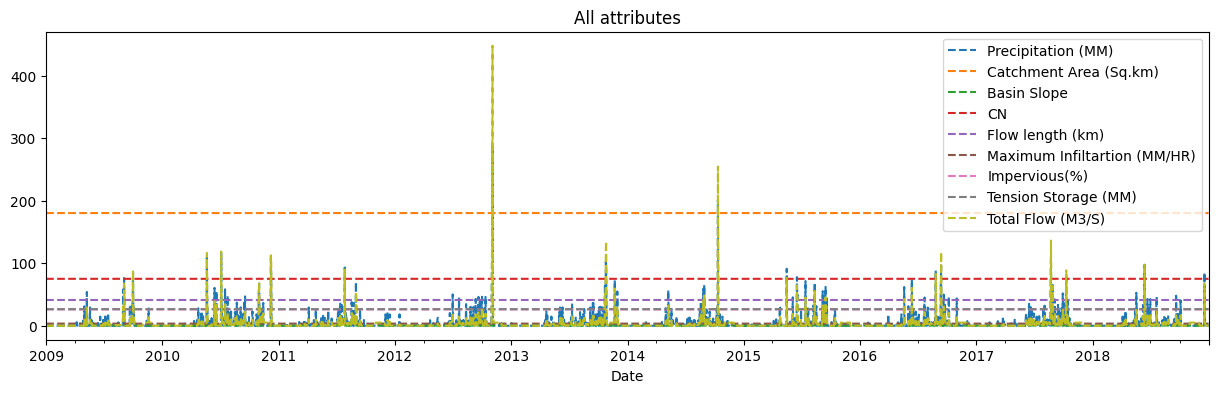

In [4]:
whole_plot=train[['Precipitation (MM)', 'Catchment Area (Sq.km)', 'Basin Slope', 'CN', 'Flow length (km)', 'Maximum Infiltartion (MM/HR)', 'Impervious(%)', 'Tension Storage (MM)', 'Total Flow (M3/S)']].plot(
    xlim=['2009-01-01', '2018-12-31'],
    figsize=(15, 4),
    linestyle='--',  # Line style
    title='All attributes' 
)

##### Plots of individual attributes.

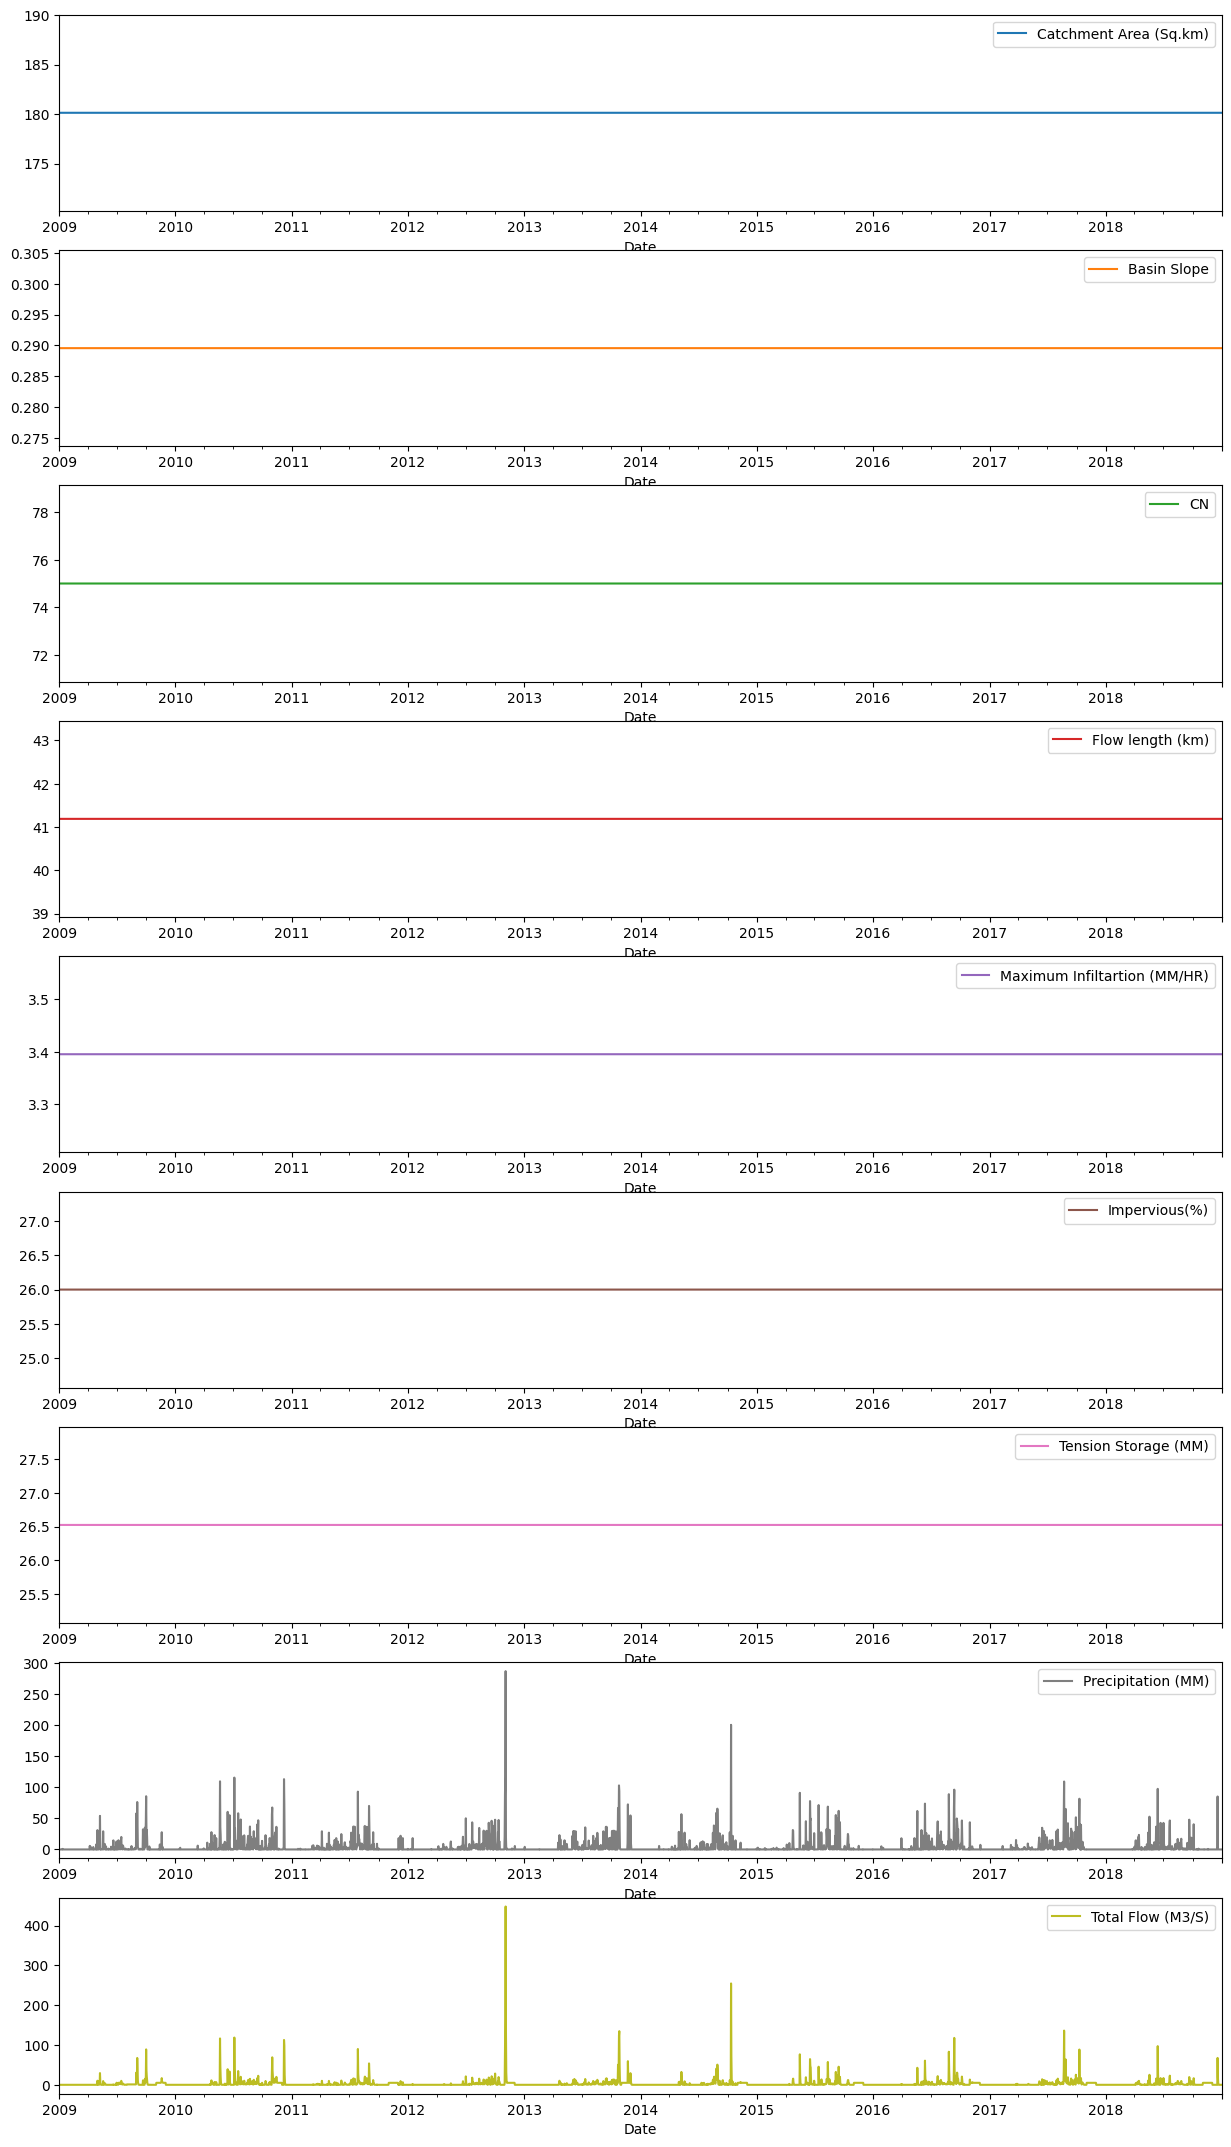

In [5]:
import matplotlib.pyplot as plt

# List of attributes to plot
columns_to_plot = [
    'Catchment Area (Sq.km)', 'Basin Slope', 'CN', 
    'Flow length (km)', 'Maximum Infiltartion (MM/HR)', 'Impervious(%)', 
    'Tension Storage (MM)','Precipitation (MM)', 'Total Flow (M3/S)'
]

# Plot each column as a subplot
isolated_plots = train[columns_to_plot].plot(
    xlim=['2009-01-01', '2018-12-31'],
    figsize=(15, len(columns_to_plot) * 3),  # Adjust figure height dynamically
    subplots=True,  # Create separate subplots
    layout=(-1, 1),  # One column layout
    sharex=False,  # Share x-axis across subplots
)


##### Plots of Stationary and Non-stationary attributes.

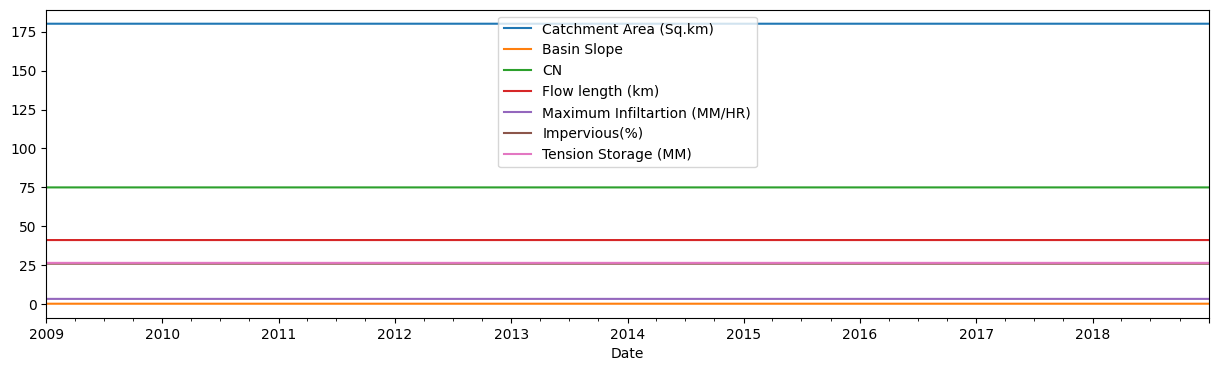

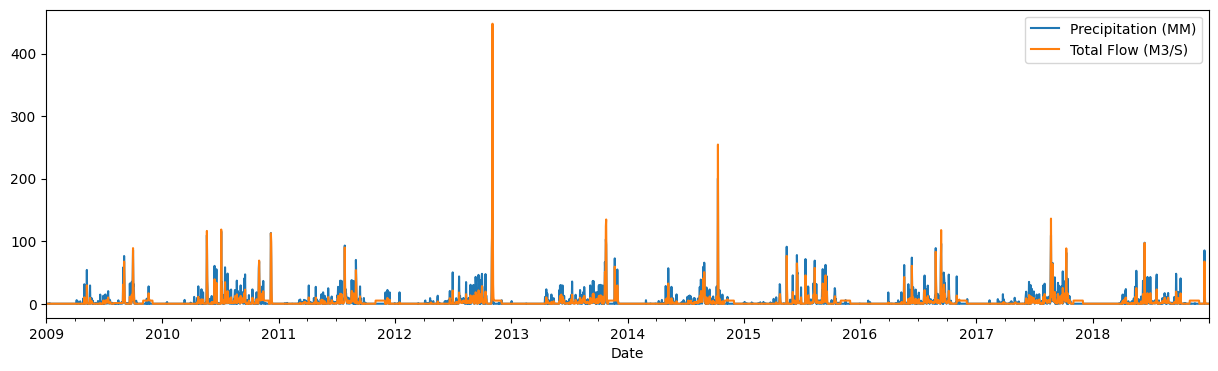

In [6]:
# Plot each column as a subplot
non_stationary_plots = train[[
    'Catchment Area (Sq.km)', 'Basin Slope', 'CN', 
    'Flow length (km)', 'Maximum Infiltartion (MM/HR)', 'Impervious(%)', 
    'Tension Storage (MM)']].plot(
    xlim=['2009-01-01', '2018-12-31'],
    figsize=(15,4),  # Adjust figure height dynamically
    layout=(-1, 1),  # One column layout
    sharex=True,  # Share x-axis across subplots
)

# Plot each column as a subplot
stationary_plots = train[['Precipitation (MM)','Total Flow (M3/S)']].plot(
    xlim=['2009-01-01', '2018-12-31'],
    figsize=(15,4),  # Adjust figure height dynamically
    layout=(-1, 1),  # One column layout
    sharex=True,  # Share x-axis across subplots
)

In [7]:
# Missing values and unique values for each attribute
print('Missing Values:\n', train.isna().sum())
print('\n Unique Values:\n', train.nunique())


Missing Values:
 Precipitation (MM)              0
Catchment Area (Sq.km)          0
Basin Slope                     0
CN                              0
Flow length (km)                0
Maximum Infiltartion (MM/HR)    0
Impervious(%)                   0
Tension Storage (MM)            0
Total Flow (M3/S)               0
dtype: int64

 Unique Values:
 Precipitation (MM)              329
Catchment Area (Sq.km)            1
Basin Slope                       1
CN                                1
Flow length (km)                  1
Maximum Infiltartion (MM/HR)      1
Impervious(%)                     1
Tension Storage (MM)              1
Total Flow (M3/S)               257
dtype: int64


In [8]:
train.describe()

,Precipitation (MM),Catchment Area (Sq.km),Basin Slope,CN,Flow length (km),Maximum Infiltartion (MM/HR),Impervious(%),Tension Storage (MM),Total Flow (M3/S)
count,3652.000000,3.652000e+03,3.652000e+03,3652.0,3.652000e+03,3.652000e+03,3652.0,3652.000,3652.000000
mean,3.943045,1.801300e+02,2.895500e-01,75.0,4.118673e+01,3.395300e+00,26.0,26.524,3.192059
std,12.490842,5.685120e-14,1.110375e-16,0.0,7.106400e-15,8.883000e-16,0.0,0.000,12.820328
min,0.000000,1.801300e+02,2.895500e-01,75.0,4.118673e+01,3.395300e+00,26.0,26.524,0.000000
25%,0.000000,1.801300e+02,2.895500e-01,75.0,4.118673e+01,3.395300e+00,26.0,26.524,0.000000
50%,0.000000,1.801300e+02,2.895500e-01,75.0,4.118673e+01,3.395300e+00,26.0,26.524,0.000000
75%,1.600000,1.801300e+02,2.895500e-01,75.0,4.118673e+01,3.395300e+00,26.0,26.524,2.900000
max,286.900000,1.801300e+02,2.895500e-01,75.0,4.118673e+01,3.395300e+00,26.0,26.524,447.700000


# Smoothing Techniques

Smoothing is used to reduce noise in time series data and make it easier to analyze trends. Moving Average techniques are commonly used for this purpose.

## Moving Average
- **Simple Moving Average**
- **Cumulative Moving Average**

## Exponential Moving Average
- **Exponential Moving Average**
- **Double Exponential Moving Average**
- **Triple Exponential Moving Average**
- **Exponential Weighted Moving Average**
- **Holt’s Linear Trend Model**
- **Holt-Winters Model**


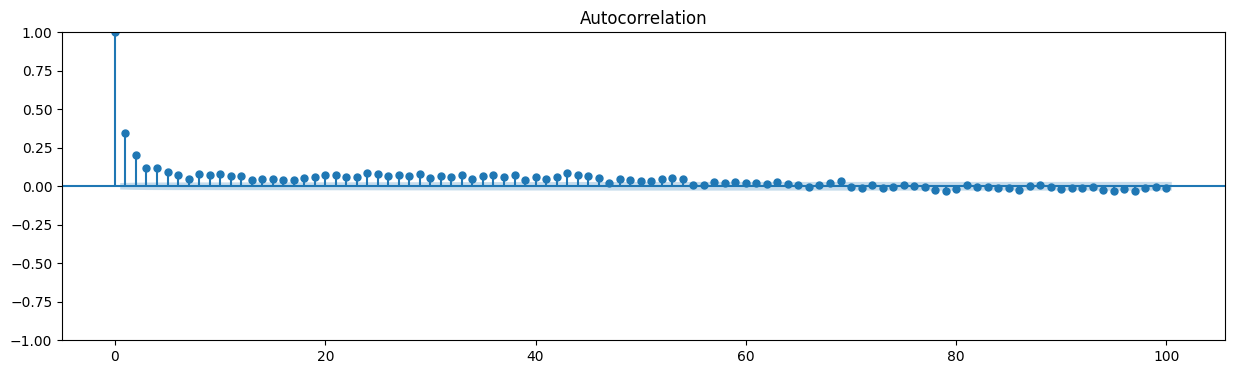

In [33]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming 'train' is your DataFrame and it contains the 'Precipitation (MM)' column
fig, ax = plt.subplots(figsize=(15, 4))  # Create a new figure and axes with the desired size
plot_acf(train["Precipitation (MM)"], lags=100, alpha=0.2, ax=ax)

# Show the plot
plt.show()
